In [1]:
# deleting profile and radmass files
import os

if os.path.exists('profileGR.dat'):
    os.remove('profileGR.dat')

if os.path.exists('radmassGR.dat'):
    os.remove('radmassGR.dat')

In [2]:
import cmath #To help us out with the complex square root
import numpy as np #For the arrays
import matplotlib.pyplot as plt #Visualization

# deleting profile and radmass files
# os.remove("radmass.txt")
# os.remove("profile.txt")

def dedP(P):
    h  = 1.e-6
    x1 = P+h
    x2 = P-h 
    x3 = P+2*h
    x4 = P-2*h 
    return (eden(x4)-8*eden(x2)+8*eden(x1)-eden(x3))/(12*h)
def dsdP(P,PCC):
    h  = 1.e-6
    x1 = P+h
    x2 = P-h 
    x3 = P+2*h
    x4 = P-2*h 
    return (sig(x4,PCC)-8*sig(x2,PCC)+8*sig(x1,PCC)-sig(x3,PCC))/(12*h)

# the TOV GR equation

def b1(r,P,m,b):
    return (4*PI*r**3*P+MSS*m)*2*GS/(2*r*(r-2*GS*MSS*m))*2*b

def P1(r,P,m,b):
    return -(eden(P)+P) * b1(r,P,m,b)/(2*b) - 2*sig(P,PCC)/r

def m1(r,P,m,b):
    return 4*PI*r**2*eden(P)/MSS

In [3]:
# hasil fitting terbaru 2022-06-18  <----- GANTI PARAMETER SET: BKA22 KE BSP B

# EOS & anisotropy NS Matter based on GUP; case beta=0
def eden_beta0e0(P0): 
    if P0 > 50.000000000000 :
        FED = 282.07731725854666 + 2.929240449172745*P0 - 0.0022457325058573845*P0**2 + 1.5412122617046955e-6*P0**3
    elif P0 > 0.5658 and P0 <= 50. :
        FED = 21.741216538741387 + 185.2377435926766*P0 - 144.30597578798978*P0**2 + 67.96738590262504*P0**3 - 19.85098051038415*P0**4 + 3.845817630385478*P0**5 - 0.519250711264411*P0**6 + 0.05057512872318498*P0**7 - 0.0036381455995991366*P0**8 + 0.00019620117398059272*P0**9 - 7.99340415788295e-6*P0**10 + 2.4619154915079735e-7*P0**11 - 5.692597599615043e-9*P0**12 + 9.718892272129773e-11*P0**13 - 1.187776627031915e-12*P0**14 + 9.82465368862169e-15*P0**15 - 4.925081141753808e-17*P0**16 + 1.1295132746663252e-19*P0**17
    elif P0 > 4.99313436e-4 and P0 <= 0.5658 :
        FED =  0.6282277465136216 + 667.7140088632083*P0 - 3654.217177967456*P0**2 + 10990.590391758089*P0**3 - 15987.00403639022*P0**4 + 9157.73481683087*P0**5
    elif P0 >= 0. and P0 <= 4.99313436e-4 :
        FED = 0.00023360915782327885 + 963.9682663375576*P0 - 6.022287440793628e6*P0**2 + 3.8959199862096825e10*P0**3 - 1.299108445236239e14*P0**4 + 2.097713931761943e17*P0**5 - 1.297185952864878e20*P0**6
    else :
        FED = 0.
    return FED
def sig_beta0e0(P0,PCC):
    sig = 0.
    exper = (P0-PCC/2)/(PCC/2.5)
    exper = -exper**(20)
    exper = np.exp(exper)
    sig = exper*sig
    return sig

# EOS & anisotropy NS Matter based on GUP; case beta=1e-7
def eden_beta1e_7(P0): 
    if P0>50. :
        FED = 277.7291096712397 + 2.8376327013933604*P0 - 0.002154466298162622*P0**2 + 1.4035711959292972e-6*P0**3
    elif P0 > 0.5658 and P0 <= 50. :
        FED = 48.05621152924977 - 26.24586960162063*P0 + 98.59336294229816*P0**2 - 59.73053805197146*P0**3 + 18.665093223307313*P0**4 - 3.594182668221451*P0**5 + 0.4632180900782332*P0**6 - 0.04190998142633307*P0**7 + 0.002740503490610357*P0**8 - 0.00013169641407261964*P0**9 + 4.6828618237286395e-6*P0**10 - 1.228898668640918e-7*P0**11 + 2.3482752539237856e-9*P0**12 - 3.1754201508766007e-11*P0**13 + 2.878294419934291e-13*P0**14 - 1.5683310786025445e-15*P0**15 + 3.882280447965985e-18*P0**16
    elif P0 > 4.99313436e-4 and P0 <= 0.5658 :
        FED = 0.6596556980482654 + 658.7820465828245*P0 - 3385.412057495701*P0**2 + 8513.26060947245*P0**3 - 7598.179318111917*P0**4
    elif P0 >= 0. and P0 <= 4.99313436e-4 :
        FED = 0.00023360915782327885 + 963.9682663375576*P0 - 6.022287440793628e6*P0**2 + 3.8959199862096825e10*P0**3 - 1.299108445236239e14*P0**4 + 2.097713931761943e17*P0**5 - 1.297185952864878e20*P0**6
    else :
        FED = 0.
    return FED
def sig_beta1e_7(P0,PCC):
    sig = 0.12056837552387968 + 0.07688401244766364*P0 - 0.0002276286297179068*P0**2 + 1.150324384979878e-6*P0**3 - 2.638361922018149e-9*P0**4 + 2.9552627363262106e-12*P0**5 - 1.285592642364798e-15*P0**6
    exper = (P0-PCC/2)/(PCC/2.5)
    exper = -exper**(20)
    exper = np.exp(exper)
    sig = exper*sig
    return sig

# EOS & anisotropy NS Matter based on GUP; case beta=1e-8
def eden_beta1e_8(P0): 
    if P0>50. :
        FED = 281.3780851067725 + 2.9230787853388*P0 - 0.0022451429563034816*P0**2 + 1.5350422400266104e-6*P0**3
    elif P0 > 0.5658 and P0 <= 50. :
        FED = 36.064244800204605 + 134.41530475418*P0 - 87.58365870097855*P0**2 + 36.22941303816551*P0**3 - 9.370463688056223*P0**4 + 1.6075431840293999*P0**5 - 0.1915264220259657*P0**6 + 0.016365834762859976*P0**7 - 0.0010245304097275278*P0**8 + 0.00004756928153784086*P0**9 - 1.6449193867407531e-6*P0**10 + 4.217975838535425e-8*P0**11 - 7.904263035492408e-10*P0**12 + 1.0511261385076943e-11*P0**13 - 9.390588156572698e-14*P0**14 + 5.052124544008177e-16*P0**15 - 1.236615776492197e-18*P0**16
    elif P0 > 4.99313436e-4 and P0 <= 0.5658 :
        FED = 0.9307968604046208 + 604.7222488924658*P0 - 2524.8772735972398*P0**2 + 4857.421563973808*P0**3 - 3148.652327034491*P0**4
    elif P0 >= 0. and P0 <= 4.99313436e-4 :
        FED = 0.00023360915782327885 + 963.9682663375576*P0 - 6.022287440793628e6*P0**2 + 3.8959199862096825e10*P0**3 - 1.299108445236239e14*P0**4 + 2.097713931761943e17*P0**5 - 1.297185952864878e20*P0**6
    else :
        FED = 0.
    return FED
def sig_beta1e_8(P0,PCC):
    sig = 0.015913128640437913 + 0.007740662593776933*P0 - 0.000024896024805009704*P0**2 + 1.2915291370409624e-7*P0**3 - 3.0832965844491094e-10*P0**4 + 3.597354418274768e-13*P0**5 - 1.6301667873403833e-16*P0**6
    exper = (P0-PCC/2)/(PCC/2.5)
    exper = -exper**(20)
    exper = np.exp(exper)
    sig = exper*sig
    return sig

# EOS & anisotropy NS Matter based on GUP; case beta=1e-9
def eden_beta1e_9(P0): 
    if P0>50. :
        FED = 281.9294734714307 + 2.930065080592614*P0 - 0.0022517316955908387*P0**2 + 1.5474017486186326e-6*P0**3
    elif P0 > 0.5658 and P0 <= 50. :
        FED = 25.830610202922383 + 165.43879268020157*P0 - 116.03388829553688*P0**2 + 49.235701111527604*P0**3 - 12.879944870321*P0**4 + 2.2206111129000647*P0**5 - 0.2649566103664792*P0**6 + 0.022625059467465472*P0**7 - 0.001413410618577376*P0**8 + 0.00006542371424887345*P0**9 - 2.2537671813278972e-6*P0**10 + 5.754305291909604e-8*P0**11 - 1.0732398448836963e-9*P0**12 + 1.4200291747537256e-11*P0**13 - 1.2619166495092905e-13*P0**14 + 6.751756157806669e-16*P0**15 - 1.6432653803273405e-18*P0**16
    elif P0 > 4.99313436e-4 and P0 <= 0.5658 :
        FED = 0.9254328183379066 + 605.3175023433296*P0 - 2524.955605659138*P0**2 + 4823.6241443050685*P0**3 - 3073.4107136582707*P0**4
    elif P0 >= 0. and P0 <= 4.99313436e-4 :
        FED = 0.00023360915782327885 + 963.9682663375576*P0 - 6.022287440793628e6*P0**2 + 3.8959199862096825e10*P0**3 - 1.299108445236239e14*P0**4 + 2.097713931761943e17*P0**5 - 1.297185952864878e20*P0**6
    else :
        FED = 0.
    return FED
def sig_beta1e_9(P0,PCC):
    sig = 0.0016283169270510053 + 0.0007748327444547611*P0 - 2.5171222962853955e-6*P0**2 + 1.3107604797043123e-8*P0**3 - 3.1458758723624496e-11*P0**4 + 3.690249269750217e-14*P0**5 - 1.6813494837513086e-17*P0**6
    exper = (P0-PCC/2)/(PCC/2.5)
    exper = -exper**(20)
    exper = np.exp(exper)
    sig = exper*sig
    return sig


# EOS & anisotropy NS Matter based on GUP; case beta=2e-7
def eden_beta2e_7(P0): 
    if P0>50. :
        FED = 218.32068878160118 + 4.015913024958688*P0 - 0.011776262461655017*P0**2 + 0.0000353973566690474*P0**3 - 6.182882810855576e-8*P0**4 + 5.6875456246648006e-11*P0**5 - 2.123794027396756e-14*P0**6
    elif P0 > 0.5658 and P0 <= 50. :
        FED = 101.50653183322409 - 226.48952084624108*P0 + 260.6622998497509*P0**2 - 123.75879957285153*P0**3 + 33.73420264153635*P0**4 - 5.922756019262281*P0**5 + 0.7132973033260214*P0**6 - 0.061252568070193726*P0**7 + 0.003842110921797544*P0**8 - 0.00017846394559337169*P0**9 + 6.1685058551281434e-6*P0**10 - 1.5803488018994392e-7*P0**11 + 2.9581544102371806e-9*P0**12 - 3.928950672071701e-11*P0**13 + 3.505583338050246e-13*P0**14 - 1.8836027652129336e-15*P0**15 + 4.604797030392396e-18*P0**16
    elif P0 > 4.99313436e-4 and P0 <= 0.5658 :
        FED = 1.309770281744584 + 547.9053013628671*P0 - 1975.4430379992832*P0**2 + 3742.452035699819*P0**3 - 2946.348916837093*P0**4
    elif P0 >= 0. and P0 <= 4.99313436e-4 :
        FED = 0.00023360915782327885 + 963.9682663375576*P0 - 6.022287440793628e6*P0**2 + 3.8959199862096825e10*P0**3 - 1.299108445236239e14*P0**4 + 2.097713931761943e17*P0**5 - 1.297185952864878e20*P0**6
    else :
        FED = 0.
    return FED
def sig_beta2e_7(P0,PCC):
    sig = 0.1504731016301074 + 0.1531753943386649*P0 - 0.00042246801549288937*P0**2 + 2.1058529378548e-6*P0**3 - 4.697863851274443e-9*P0**4 + 5.115630837060703e-12*P0**5 - 2.1635443413010636e-15*P0**6
    exper = (P0-PCC/2)/(PCC/2.5)
    exper = -exper**(20)
    exper = np.exp(exper)
    sig = exper*sig
    return sig

In [4]:
# define the Runge-Kutta 4th order for the problem
# source: https://www.codesansar.com/numerical-methods/
#         runge-kutta-fourth-order-rk4-python-program.htm
# if we want to print the profile, set profile=1
# if we not, set profile=0
def RungeKutta(rCC,bCC,PCC,MCC,h,profile):
    # input initial values
    r0 = rCC
    b0 = bCC
    P0 = PCC
    m0 = MCC
    Perror=0
    Merror=0
    Rerror=0
    while (P0 > 0.):
        if profile == 1:
            f0 = 1-2*GS*MSS*m0/r0
            print(r0/1000, b0, P0, m0, f0, file=open('profileGR.dat', 'a'))
        # calculate k1
        r01 = r0
        b01 = b0
        P01 = P0
        m01 = m0
        k1_b = h * b1(r01,P01,m01,b01)
        k1_P = h * P1(r01,P01,m01,b01)
        k1_m = h * m1(r01,P01,m01,b01)
        # calculate k2
        r01 = r0 + h/2
        b01 = b0 + k1_b/2
        P01 = P0 + k1_P/2
        m01 = m0 + k1_m/2
        k2_b = h * b1(r01,P01,m01,b01)
        k2_P = h * P1(r01,P01,m01,b01)
        k2_m = h * m1(r01,P01,m01,b01)
        # calculate k3
        r01 = r0 + h/2
        b01 = b0 + k2_b/2
        P01 = P0 + k2_P/2
        m01 = m0 + k2_m/2
        k3_b = h * b1(r01,P01,m01,b01)
        k3_P = h * P1(r01,P01,m01,b01)
        k3_m = h * m1(r01,P01,m01,b01)
        # calculate k4
        r01 = r0 + h
        b01 = b0 + k3_b
        P01 = P0 + k3_P
        m01 = m0 + k3_m
        k4_b = h * b1(r01,P01,m01,b01)
        k4_P = h * P1(r01,P01,m01,b01)
        k4_m = h * m1(r01,P01,m01,b01)
        # calculate the next r0, P0, m0, and b0
        r0 = r0 + h
        b0 = b0 + (k1_b+2*k2_b+2*k3_b+k4_b)/6
        P0 = P0 + (k1_P+2*k2_P+2*k3_P+k4_P)/6
        m0 = m0 + (k1_m+2*k2_m+2*k3_m+k4_m)/6
        f0 = 1-2*GS*MSS*m0/r0
        # print(r0,P0,m0)
        # print(P0)
        if P0 >1.001*PCC:
            print("P naik")
            Perror = 1
            break
        elif m0<0:
            print("m negatif")
            Merror = 1
            break
        elif r0>1.e5:
            print("r > 1.e5 meter")
            Rerror = 1
            break
    if Perror==1 or Merror==1 or Rerror==1:
        print("PCC=",PCC,"hasil error")
    elif profile == 1:
        f0 = 1-2*GS*MSS*m0/r0
        print(r0/1000, b0, P0, m0, f0, file=open('profileGR.dat', 'a'))
    # the results at the surface
    output = np.array([r0,b0,P0,m0,f0])
    return output


# define for a single PCC
def single_PCC(x,radmassdata,profile):
    # define initial parameters
    rCC = 1.*10**(-12) # radius near center in m--the starting point
    rmax = 100000. # radius at far distances in m
    PCC = x # pressure at the center in MeV / fm^3
    MCC = (4*PI/3)*eden(PCC)*rCC**3/MSS # Mass at the center in MeV m^3 / fm^3
    bCC = 1-2*GS*MSS*MCC/rCC # metric function b(r) at the center

    h = 10. # h-step

    # calculate the surface values
    output=RungeKutta(rCC,bCC,PCC,MCC,h,0)
    # print(output)

    # at the surface, b = 1-2Gm/r, which is different to the result
    rSurface=output[0]
    bSurface=output[1]
    mSurface=output[3]
    bSurfaceTarget = 1-2*GS*MSS*mSurface/rSurface

    # So, we redefine bCC as follows
    bCorrection=bSurfaceTarget/bSurface
    # print("cek bCC ",abs(bCorrection-1))

    # print(PCC, rSurface, mSurface, GS*MSS*mSurface/rSurface, bCorrection)

    # if abs(bCorrection) not near 1, then recalculate
    while (abs(bCorrection-1)>10**(-3)):
        # print("abs(bCorrection-1)>10**(-3)")
        bCC=bCC*bCorrection
        output=RungeKutta(rCC,bCC,PCC,MCC,h,0)
        rSurface=output[0]
        bSurface=output[1]
        mSurface=output[3]
        bSurfaceTarget = 1-2*GS*MSS*mSurface/rSurface
        bCorrection=bSurfaceTarget/bSurface

    rSurface=output[0]
    bSurface=output[1]
    mSurface=output[3]
    bSurfaceTarget = 1-2*GS*MSS*mSurface/rSurface
    bCorrection=bSurfaceTarget/bSurface
    print(PCC, rSurface, mSurface, GS*MSS*mSurface/rSurface, bCorrection)

    if profile == 1:
        output=RungeKutta(rCC,bCC,PCC,MCC,h,profile)
        # print(output)
    if radmassdata == 1:
        print(PCC, (eden(PCC)/1000), (rSurface/1000), mSurface, 
            2*GS*MSS*mSurface/rSurface, 0.5*np.log(bCC),
            file=open('radmassGR.dat', 'a'))

    output2=np.array([PCC, (eden(PCC)/1000), (rSurface/1000), mSurface, GS*MSS*mSurface/rSurface])
    return output2

In [24]:
# some constants
GS = 1.325 * 10**(-12) # Newton constant in m^4 / MeV fm^3
MSS = 1.1155 * 10**(15) # Sun's mass in MeV m^3 / fm^3
PI = np.pi 
HC = 197.327 # hc=1=197.327 MeV fm


def eden(P0):
    return eden_beta2e_7(P0)
def sig(P0,PCC):
    return sig_beta2e_7(P0,PCC)

In [25]:
# this is only for a single PCC & PRINT PROFILE
if os.path.exists('profileGR.dat'):
    os.remove('profileGR.dat')
    
PCC=300
output=single_PCC(PCC,0,1)

300 12630.0 1.9670747452066748 0.23019875207588358 0.9999999999254104


In [26]:
# this is for multiple PCC

if os.path.exists('radmassGR.dat'):
    os.remove('radmassGR.dat')
    
for x in range(1, 5, 1):
    PCC=x
    single_PCC(PCC,1,0)
    
for x in range(5, 801, 5):
    PCC=x
    if PCC==300:
        # single_PCC(PCC,1,1)
        single_PCC(PCC,1,0)
    else:
        single_PCC(PCC,1,0)

1 19690.0 0.19987608099471732 0.01500377567614167 0.9999999999999983
2 18190.0 0.30161327250771164 0.02450773651809328 1.0000000000000002
3 17840.0 0.36639121436799377 0.03035537861583147 1.0
4 17530.0 0.4210580837738336 0.035501405447568024 1.0
5 17260.0 0.4687984933460373 0.04014494513956799 0.9999999999999986
10 16550.0 0.6420132507975291 0.05733653535804548 1.000000000000004
15 15970.0 0.7625710970640323 0.07057662353642952 0.9999999999999999
20 15540.0 0.859444479449525 0.08174331851958667 0.9999999999999998
25 15240.0 0.9443372495852359 0.09158568684605235 0.9999999999999968
30 15000.0 1.0204294469653221 0.10054886591460047 0.9999999999999845
35 14820.0 1.0875317286549142 0.10846239388608551 1.000000000000075
40 14670.0 1.1496776910903712 0.11583277030299824 0.9999999999999996
45 14570.0 1.2042871538199622 0.12216757543679972 0.9999999999975896
50 14460.0 1.2545842743092743 0.12823807775514479 1.0000000000000366
55 14370.0 1.3001090384796445 0.13372372393610696 1.0000000000039895

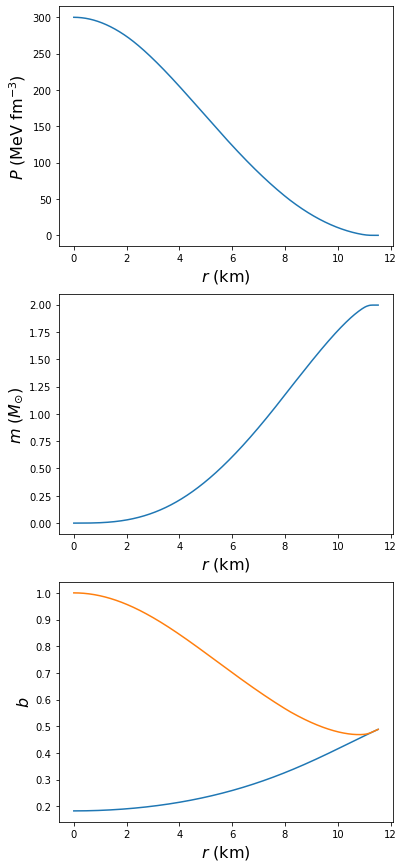

In [16]:
# plotting the profile from 1 PCC

profile=np.loadtxt("profileGR.dat")[:, :]
profr0=profile[:,0]
profb0=profile[:,1]
profP0=profile[:,2]
profm0=profile[:,3]
proff0=profile[:,4]

fig, ax = plt.subplots(3, 1, figsize = (6,15))

ax[0].plot(profr0, profP0)
ax[0].set_xlabel(r'$r$ (km)', fontsize=16)
ax[0].set_ylabel(r'$P$ (MeV fm$^{-3}$)', fontsize=16)

ax[1].plot(profr0, profm0)
ax[1].set_xlabel(r'$r$ (km)', fontsize=16)
ax[1].set_ylabel(r'$m$ ($M_{\odot}$)', fontsize=16)

ax[2].plot(profr0, profb0, profr0, proff0)
ax[2].set_xlabel(r'$r$ (km)', fontsize=16)
ax[2].set_ylabel(r'$b$', fontsize=16)

plt.show()

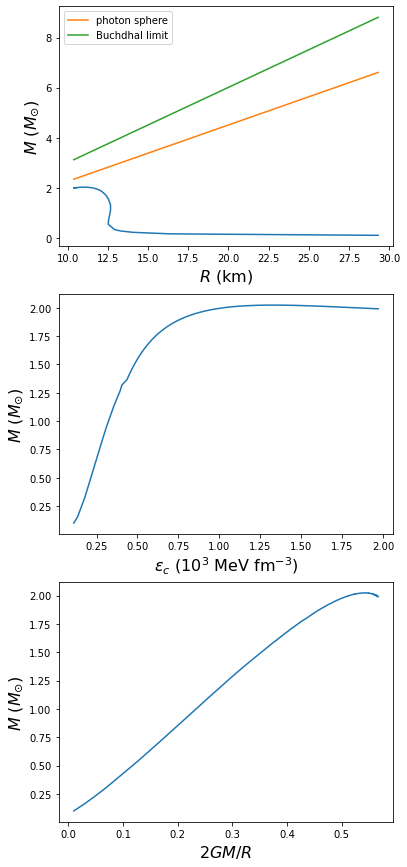

In [17]:
# plot all PCC

radmass=np.loadtxt("radmassGR.dat")[:, :]
dataEden=radmass[:,1]
dataRad=radmass[:,2]
dataMass=radmass[:,3]
dataCompactness=radmass[:,4]

fig, ax = plt.subplots(3, 1, figsize = (6,15))

x = dataRad
maxiter=len(x)-1
y = [0]*(maxiter+1)  # make arrays for photn sphere
y1 = [0]*(maxiter+1)  # make arrays for photn sphere
for n in range(0, maxiter+1, 1):
    y[n] = x[n]*1.e3/(3*GS*MSS)
    y1[n] = x[n]*1.e3/(GS*MSS)*(4./9.)

ax[0].plot(dataRad, dataMass)
ax[0].plot(x, y, label='photon sphere')
ax[0].plot(x, y1, label='Buchdhal limit')
ax[0].set_xlabel(r'$R$ (km)', fontsize=16)
ax[0].set_ylabel(r'$M$ ($M_{\odot}$)', fontsize=16)
ax[0].legend()


ax[1].plot(dataEden, dataMass)
ax[1].set_xlabel(r'$\epsilon_c$ ($10^3$ MeV fm$^{-3}$)', fontsize=16)
ax[1].set_ylabel(r'$M$ ($M_{\odot}$)', fontsize=16)

ax[2].plot(dataCompactness, dataMass)
ax[2].set_xlabel(r'$2GM/R$', fontsize=16)
ax[2].set_ylabel(r'$M$ ($M_{\odot}$)', fontsize=16)

plt.show()

In [113]:
l = None

# effective potential outside the star in analytic form
def VeffOutside(r,mSurface,l):
    return (l*(l+1) - 6*GS*MSS*mSurface/r)*(1-2*GS*MSS*mSurface/r)/(r**2)*(GS*MSS*mSurface)**2
    
# effective potential inside the star in analytic form
def VeffInsideGR(r,mSurface,m,b,P,l):
    return (l*(l+1) - 6*GS*MSS*m/r + 4*PI*GS*r**2*( eden(P)-P ) )*b/(r**2)*(GS*MSS*mSurface)**2

def rtortoise(r,m):  #definisi r tortoise
    return r + 2*GS*MSS*m*np.log( r/(2*GS*MSS*m)-1 )

In [114]:
# this is to calculate r tortoise outside the star numerically

# r-tortoise equation outside the star
def rtorOut1(r,mSurface):
    return 1./(1-2*GS*MSS*mSurface/r)

def RungeKuttaTortoise(rmax,rtormax,mSurface,rSurface,rCC,l,profile):
    # input initial values
    h = -10.
    r0 = rmax
    rtor0 = rtormax
    while (r0 > rCC):
        if profile == 1:
            VeffOut=VeffOutside(r0,mSurface,l)
            print(r0/1000, rtor0/1000, VeffOut, file=open('rtorGR.dat', 'a'))
        # calculate k1
        r01 = r0
        rtor01 = rtor0
        k1_rtor = h * rtorOut1(r01,mSurface)
        # calculate k2
        r01 = r0 + h/2
        rtor01 = rtor0 + k1_rtor/2
        k2_rtor = h * rtorOut1(r01,mSurface)
        # calculate k3
        r01 = r0 + h/2
        rtor01 = rtor0 + k2_rtor/2
        k3_rtor = h * rtorOut1(r01,mSurface)
        # calculate k4
        r01 = r0 + h
        rtor01 = rtor0 + k3_rtor
        k4_rtor = h * rtorOut1(r01,mSurface)
        # calculate the next r0, P0, m0, and b0
        r0 = r0 + h
        rtor0 = rtor0 + (k1_rtor+2*k2_rtor+2*k3_rtor+k4_rtor)/6
        if r0 < rSurface: #2*GS*MSS*mSurface:
            break
    # the results at the surface
    output2 = np.array([r0,rtor0])
    return output2

In [115]:
def integrate_inside(rtorSurface,l,profile):
    function = [0]*(maxdata+1)  # make arrays for r-tortoise equation inside the star
    for n in range(0, maxdata+1, 1):
        function[n] = 1/np.sqrt(profb0[n]*proff0[n])

    # calculate r-tortoise inside the star
    dr = (profr0[1]-profr0[0])
    for n in range(maxdata, 0, -1):
        rtorInt = rtorSurface - (dr/2)*(function[n] + 2 * sum(function[n+1:maxdata]) + function[maxdata])
        VeffInGR = VeffInsideGR(profr0[n],mSurface,profm0[n],profb0[n],profP0[n],l)
        if profile == 1:
            print(profr0[n]/1000, rtorInt/1000, VeffInGR, file=open('rtorGR_int.dat', 'a'))
    # the result at the center
    output3 = np.array([profr0[0],rtorInt])
    return output3

In [116]:
profile=np.loadtxt("profileGR.dat")[:, :]
profr0=profile[:,0]*1000
profb0=profile[:,1]
profP0=profile[:,2]
profm0=profile[:,3]
proff0=profile[:,4]

maxdata=len(profr0)-1
rSurface=profr0[maxdata]
mSurface=profm0[maxdata]

In [117]:
l=None
l=2 # input

    
# calculate r tortoise outside the star
rmax = 1000.e+3  # meter
rCC = profr0[0]
rmax2 = rmax + rCC
rtormax = rtortoise(rmax2,mSurface)
print(rmax2,rtormax)
if os.path.exists('rtorGR.dat'):
    os.remove('rtorGR.dat')
output2 = RungeKuttaTortoise(rmax2,rtormax,mSurface,rSurface,rCC,l,1)
print(output2)

# calculate r tortoise inside the star
if os.path.exists('rtorGR_int.dat'):
    os.remove('rtorGR_int.dat')
rtorSurface = rtortoise(rSurface,mSurface)
print(rSurface,rtorSurface)
output3 = integrate_inside(rtorSurface,l,1)
print(output3)

1000000.0 1032599.9661084174
[ 7300.         -6065.74818307]
7300.000000000001 -6065.748182776845
[ 1.00000000e-12 -3.88855571e+05]


In [118]:
profile=np.loadtxt("rtorGR_int.dat")[:, :]
r_int=profile[:,0]
rtor_int=profile[:,1]
VeffGR_int=profile[:,2]

profile=np.loadtxt("rtorGR.dat")[:, :]
r_out=profile[:,0]
rtor_out=profile[:,1]
VeffGR_out=profile[:,2]

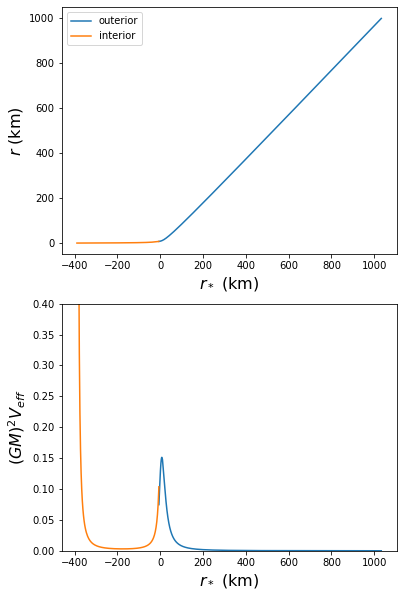

In [119]:
fig, ax = plt.subplots(2, 1, figsize = (6,10))

ax[0].plot(rtor_out, r_out, label='outerior')
ax[0].plot(rtor_int, r_int, label='interior')
ax[0].set_xlabel(r'$r_*$ (km)', fontsize=16)
ax[0].set_ylabel(r'$r$ (km)', fontsize=16)
# ax[0].set_ylim([0,150])
ax[0].legend()

ax[1].plot(rtor_out, VeffGR_out)
ax[1].plot(rtor_int, VeffGR_int)
ax[1].set_xlabel(r'$r_*$ (km)', fontsize=16)
ax[1].set_ylabel(r'$(GM)^2 V_{eff}$', fontsize=16)
ax[1].set_ylim([0.,.4])
# ax[1].set_xlim([-800,1125])
# ax[1].legend()


plt.show()

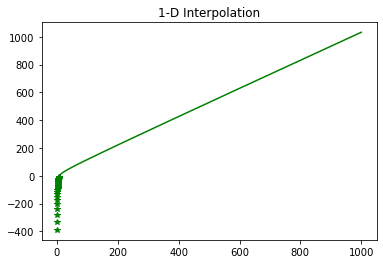

In [120]:
# hitung tau echo

# Import the required Python libraries
from scipy import interpolate
  
# Interpolation
temp_int = interpolate.interp1d(r_int, rtor_int)
xnew_int = np.arange(r_int[len(r_int)-1], r_int[0], 0.2)
ynew_int = temp_int(xnew_int)
  
# Interpolation
temp_out = interpolate.interp1d(r_out, rtor_out)
xnew_out = np.arange(r_out[len(r_out)-1], r_out[0], 0.2)
ynew_out = temp_out(xnew_out)
  
plt.title("1-D Interpolation")
plt.plot(xnew_int, ynew_int, '*', xnew_out, ynew_out, '-', color="green")
plt.show()

In [122]:
# calculate tau echo

# display r tortoise at faraway, light ring, surface from exterior data, surface from interior data, and the center
print(temp_out(r_out[0]),temp_out(3*GS*MSS*mSurface/1000),temp_out(r_out[len(r_out)-1]),temp_int(r_int[0]),temp_int(r_int[len(r_int)-1]))

# tau echo rumus approx yg integrasi dari permukaan ke photon sphere saja
def tauapp(r,m):
    return 4*GS*MSS*m*abs(np.log(r/(2*GS*MSS*m)-1)) 
tauapprox= tauapp(rSurface,mSurface) 
fapprox = PI/(tauapprox)*3.e8

# tau echo rumus numerik yg integrasi dari permukaan ke photon sphere
tauecho = ( temp_out(3*GS*MSS*mSurface/1000) - temp_out(r_out[len(r_out)-1]) )*1000
fecho = PI/(tauecho)*3.e8

# tau echo rumus numerik yg integrasi dari pusat ke photon sphere
tauecho_0 = ( temp_out(3*GS*MSS*mSurface/1000) - temp_int(r_int[len(r_int)-1]) )*1000
fecho_0 = PI/(tauecho_0)*3.e8

print(fapprox,fecho,fecho_0)
if os.path.exists('tauechoGR.dat'):
    os.remove('tauechoGR.dat')
print(fapprox,fecho,fecho_0, file=open('tauechoGR.dat', 'a'))



1032.5999661084174 5.2262240647732945 -5.977490122557338 -6.154480905466892 -388.85557064306033
35257.20308315469 84121.90638910705 2391.579130864639


In [ ]:
# below is my old code

In [1]:
# # source: https://www.codesansar.com/numerical-methods/
# #         runge-kutta-fourth-order-rk4-python-program.htm



# # define the Runge-Kutta 4th order for the problem
# # if we want to print the profile, set profile=1
# # if we not, set profile=0
# def RungeKutta(rCC,bCC,PCC,MCC,h,profile):
#     # input initial values
#     r0 = rCC
#     b0 = bCC
#     P0 = PCC
#     m0 = MCC
#     while (P0 > 0.):
#         if profile == 1:
#             print(r0, b0, P0, m0, file=open('profile.dat', 'a'))
#         # calculate k1
#         r01 = r0
#         b01 = b0
#         P01 = P0
#         m01 = m0
#         k1_b = h * b1(r01,P01,m01,b01)
#         k1_P = h * P1(r01,P01,m01,b01)
#         k1_m = h * m1(r01,P01,m01,b01)
#         # calculate k2
#         r01 = r0 + h/2
#         b01 = b0 + k1_b/2
#         P01 = P0 + k1_P/2
#         m01 = m0 + k1_m/2
#         k2_b = h * b1(r01,P01,m01,b01)
#         k2_P = h * P1(r01,P01,m01,b01)
#         k2_m = h * m1(r01,P01,m01,b01)
#         # calculate k3
#         r01 = r0 + h/2
#         b01 = b0 + k2_b/2
#         P01 = P0 + k2_P/2
#         m01 = m0 + k2_m/2
#         k3_b = h * b1(r01,P01,m01,b01)
#         k3_P = h * P1(r01,P01,m01,b01)
#         k3_m = h * m1(r01,P01,m01,b01)
#         # calculate k4
#         r01 = r0 + h
#         b01 = b0 + k3_b
#         P01 = P0 + k3_P
#         m01 = m0 + k3_m
#         k4_b = h * b1(r01,P01,m01,b01)
#         k4_P = h * P1(r01,P01,m01,b01)
#         k4_m = h * m1(r01,P01,m01,b01)
#         # calculate the next r0, P0, m0, and b0
#         r0 = r0 + h
#         b0 = b0 + (k1_b+2*k2_b+2*k3_b+k4_b)/6
#         P0 = P0 + (k1_P+2*k2_P+2*k3_P+k4_P)/6
#         m0 = m0 + (k1_m+2*k2_m+2*k3_m+k4_m)/6
#     # the results at the surface
#     output = np.array([r0,b0,P0,m0])
#     return output

In [2]:
# # this is only for a single PCC

# # define initial parameters
# rCC = .000000001 # radius near center in m--the starting point
# rmax = 100000. # radius at far distances in m
# PCC = 300. # pressure at the center in MeV / fm^3
# MCC = (4*PI/3)*eden(PCC)*rCC**3 # Mass at the center in MeV m^3 / fm^3
# bCC = 1-2*GS*MSS*MCC/rCC # metric function b(r) at the center

# h = 1. # h-step

# # calculate the surface values
# output=RungeKutta(rCC,bCC,PCC,MCC,h,0)
# print(output)

# # at the surface, b = 1-2Gm/r, which is different to the result
# rSurface=output[0]
# bSurface=output[1]
# mSurface=output[3]
# bSurfaceTarget = 1-2*GS*MSS*mSurface/rSurface

# # So, we redefine bCC as follows
# bCorrection=bSurfaceTarget/bSurface
# print(abs(bCorrection-1))

# # if abs(bCorrection) not near 1, then recalculate
# while (abs(bCorrection-1)>10**(-3)):
#     bCC=bCC*bCorrection
#     output=RungeKutta(rCC,bCC,PCC,MCC,h,0)
#     # print(output)
#     rSurface=output[0]
#     bSurface=output[1]
#     mSurface=output[3]
#     bSurfaceTarget = 1-2*GS*MSS*mSurface/rSurface
#     bCorrection=bSurfaceTarget/bSurface
#     print(abs(bCorrection-1))

# # if we want to print the profile, run this  
# output=RungeKutta(rCC,bCC,PCC,MCC,h,1)
# print(output)

[ 1.09150000e+04  2.49308862e+00 -1.05436656e-02  2.00273651e+00]
0.8164504909323783
4.6629367034256575e-15
[ 1.09150000e+04  4.57605192e-01 -1.05436656e-02  2.00273651e+00]


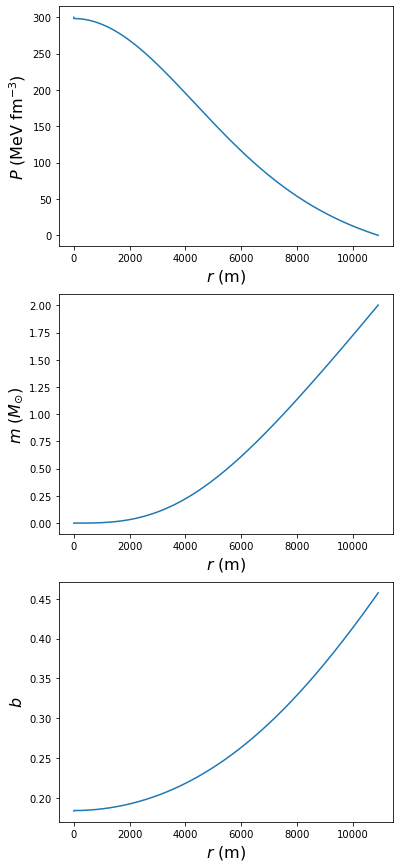

In [3]:
# # plotting the profile from 1 PCC

# profile=np.loadtxt("profile.dat")[:, :]
# profr0=profile[:,0]
# profb0=profile[:,1]
# profP0=profile[:,2]
# profm0=profile[:,3]

# fig, ax = plt.subplots(3, 1, figsize = (6,15))

# ax[0].plot(profr0, profP0)
# ax[0].set_xlabel(r'$r$ (m)', fontsize=16)
# ax[0].set_ylabel(r'$P$ (MeV fm$^{-3}$)', fontsize=16)

# ax[1].plot(profr0, profm0)
# ax[1].set_xlabel(r'$r$ (m)', fontsize=16)
# ax[1].set_ylabel(r'$m$ ($M_{\odot}$)', fontsize=16)

# ax[2].plot(profr0, profb0)
# ax[2].set_xlabel(r'$r$ (m)', fontsize=16)
# ax[2].set_ylabel(r'$b$', fontsize=16)

# plt.show()

In [4]:
# # FOR MULTIPLE PCC

# import cmath #To help us out with the complex square root
# import numpy as np #For the arrays
# import matplotlib.pyplot as plt #Visualization

# rCC = .000000001 # radius near center in m--the starting point
# rmax = 100000. # radius at far distances in m

# h = 1. # h-step

# for x in range(1, 601, 1):
#     PCC=x    # pressure at the center in MeV / fm^3
#     MCC = (4*PI/3)*eden(PCC)*rCC**3 # Mass at the center in MeV m^3 / fm^3
#     bCC = 1-2*GS*MSS*MCC/rCC # metric function b(r) at the center
    
#     # calculate the surface values
#     output=RungeKutta(rCC,bCC,PCC,MCC,h,0)
#     # at the surface, b = 1-2Gm/r, which is different to the result
#     rSurface=output[0]
#     bSurface=output[1]
#     mSurface=output[3]
#     bSurfaceTarget = 1-2*GS*MSS*mSurface/rSurface
    
#     # So, we redefine bCC as follows
#     bCorrection=bSurfaceTarget/bSurface
    
#     # if abs(bCorrection) not near 1, then recalculate
#     while (abs(bCorrection-1)>10**(-3)):
#         bCC=bCC*bCorrection
#         output=RungeKutta(rCC,bCC,PCC,MCC,h,0)
#         rSurface=output[0]
#         bSurface=output[1]
#         mSurface=output[3]
#         bSurfaceTarget = 1-2*GS*MSS*mSurface/rSurface
#         bCorrection=bSurfaceTarget/bSurface
        
#     rSurface=output[0]
#     mSurface=output[3]
    
#     #print the results
#     print(PCC, (rSurface/1000), mSurface, 
#           GS*MSS*mSurface/rSurface)    
#     print(PCC, (eden(PCC)/1000), (rSurface/1000), mSurface, 
#           GS*MSS*mSurface/rSurface,
#           file=open('radmass.dat', 'a'))

1 2.496000000001 0.013503496331325856 0.00799626360529008
2 3.524000000001 0.03819741493934012 0.016020775165547358
3 4.269000000001 0.06824793226022778 0.023629187907719083
4 4.866000000001001 0.10157425181690904 0.030852970246568804
5 5.368000000001 0.13703403811363254 0.037731268090227345
6 5.800000000001001 0.17369142124456255 0.04426248862546824
7 6.181000000001 0.21122104927829452 0.05050843417288734
8 6.5200000000010006 0.24908351787881536 0.05646545706391917
9 6.824000000001001 0.28690678564857425 0.062142290180684685
10 7.100000000001001 0.32463112368058306 0.06757985555872846
11 7.352000000001 0.36207187559495413 0.07279050732108325
12 7.583000000001 0.399061548165687 0.07778292667768215
13 7.795000000001 0.43539769699482683 0.08255729616060406
14 7.991000000001001 0.47112681385530036 0.08714092080259869
15 8.173000000001 0.5062319872554832 0.09154898579016696
16 8.342000000001 0.5405879652486544 0.09578150140087653
17 8.500000000001 0.5742962603309335 0.09986251869162141
18 

141 11.385000000001 1.8901717124993522 0.24538820136258369
142 11.383000000001001 1.8923004040166265 0.24570771838719827
143 11.381000000001 1.8944069154764909 0.2460244672114346
144 11.380000000001 1.8968271633984262 0.2463604286925531
145 11.378000000001 1.8988898801808696 0.2466716867004381
146 11.376000000001001 1.900931081011088 0.24698025867173684
147 11.374000000001 1.9029509827011424 0.2472861713639785
148 11.372000000001 1.9049497994810367 0.24758945121792159
149 11.371000000001 1.9072628999493129 0.24791188888255947
150 11.369000000001 1.9092200634686594 0.24820994366776405
151 11.367000000001001 1.9111567677904924 0.24850544305207095
152 11.365000000001 1.9130732172047689 0.24879841225464533
153 11.363000000001 1.9149696135900631 0.24908887619874798
154 11.360000000001001 1.9165115973803426 0.24935528258035194
155 11.358000000001 1.9183686086234943 0.24964084718859814
156 11.356000000001 1.9202061599724087 0.2499239795852385
157 11.354000000001001 1.922024443946169 0.2502047

280 10.978000000001 2.0023610708734867 0.2695905220705867
281 10.975000000001 2.0024800630472197 0.2696802392880077
282 10.971000000001 2.002281063412318 0.26975175437635707
283 10.968000000001 2.002388364008627 0.2698399974077435
284 10.965000000001 2.0024898031219682 0.26992749862121435
285 10.962000000001 2.002585429638698 0.27001426399920964
286 10.959000000001 2.002675291972677 0.27010029946699465
287 10.955000000001 2.0024483092509526 0.2701682969314682
288 10.952000000001 2.0025269650854276 0.27025291719842787
289 10.949000000001 2.0025999989809686 0.27033682491492944
290 10.946000000001 2.002667457511703 0.27042002578400165
291 10.943000000001 2.0027293868053233 0.27050252545462866
292 10.940000000001 2.0027858325480086 0.27058432952234057
293 10.937000000001001 2.002836839989333 0.27066544352980365
294 10.933000000001 2.002572576410807 0.27072874457207685
295 10.930000000001 2.0026130181715245 0.2708085213948237
296 10.927000000001 2.0026481545774244 0.2708876243956217
297 10.

420 10.573000000001 1.9820332352670813 0.27707551763650723
421 10.571000000001 1.9819356043040368 0.277114288690403
422 10.568000000001 1.98154618011469 0.2771384899877922
423 10.565000000001 1.9811547653147519 0.2771624265441197
424 10.563000000001 1.9810505984202402 0.27720032887080165
425 10.560000000001 1.9806551043597636 0.2772237233721464
426 10.558000000001 1.9805466084477599 0.27726104923123013
427 10.555000000001 1.9801470930503504 0.27728390895728366
428 10.553000000001001 1.980034326634278 0.2773206657872106
429 10.550000000001 1.9796308469237915 0.27734299790614647
430 10.548000000001 1.9795138676225972 0.2773791930333671
431 10.545000000001 1.9791064797392468 0.2774010046038235
432 10.543000000001001 1.9789853442933478 0.2774366452447786
433 10.540000000001001 1.978574103509517 0.2774579432178055
434 10.538000000001 1.9784488677963243 0.2774930364808533
435 10.535000000001 1.9780338285321073 0.27751382770182687
436 10.533000000001 1.9779045475813433 0.2775483805891466
437 

560 10.254000000001 1.9409179337565154 0.27976882099808514
561 10.252000000001 1.9406138282851717 0.2797795563035275
562 10.250000000001 1.9403087814977613 0.27979016006172847
563 10.248000000001001 1.9400027991263789 0.27980063302239216
564 10.246000000001 1.9396958868659349 0.27981097593044396
565 10.244000000001 1.9393880503744123 0.27982118952606305
566 10.242000000001001 1.9390792952731672 0.27983127454472106
567 10.240000000001 1.938769627147191 0.27984123171721537
568 10.238000000001 1.938459051545376 0.27985106176970287
569 10.236000000001 1.9381475739807763 0.279860765423733
570 10.234000000001 1.9378351999309158 0.2798703433962879
571 10.232000000001001 1.9375219348379813 0.27987979639980576
572 10.230000000001 1.9372077841091777 0.2798891251422276
573 10.228000000001 1.9368927531168942 0.2798983303270171
574 10.226000000001001 1.9365768471990177 0.2799074126532014
575 10.224000000001 1.9362600716591862 0.2799163728154033
576 10.222000000001 1.9359424317670109 0.2799252115038

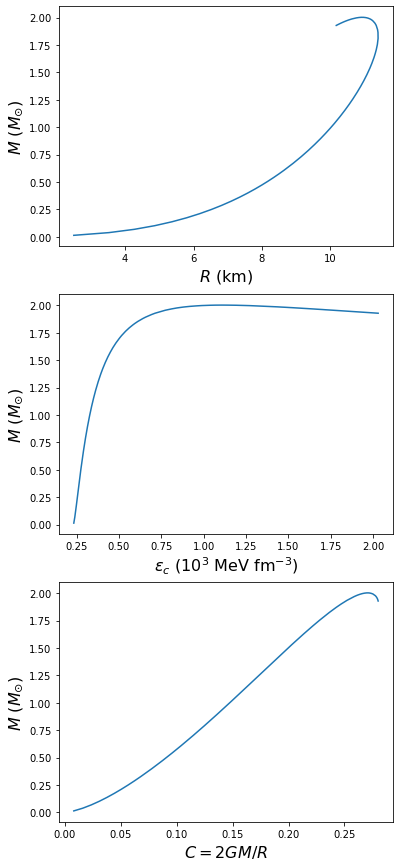

In [5]:
# # plot all PCC

# radmass=np.loadtxt("radmass.dat")[:, :]
# dataEden=radmass[:,1]
# dataRad=radmass[:,2]
# dataMass=radmass[:,3]
# dataCompactness=radmass[:,4]

# fig, ax = plt.subplots(3, 1, figsize = (6,15))

# ax[0].plot(dataRad, dataMass)
# ax[0].set_xlabel(r'$R$ (km)', fontsize=16)
# ax[0].set_ylabel(r'$M$ ($M_{\odot}$)', fontsize=16)

# ax[1].plot(dataEden, dataMass)
# ax[1].set_xlabel(r'$\epsilon_c$ ($10^3$ MeV fm$^{-3}$)', fontsize=16)
# ax[1].set_ylabel(r'$M$ ($M_{\odot}$)', fontsize=16)

# ax[2].plot(dataCompactness, dataMass)
# ax[2].set_xlabel(r'$C=2GM/R$', fontsize=16)
# ax[2].set_ylabel(r'$M$ ($M_{\odot}$)', fontsize=16)

# plt.show()